In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')

cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [9]:
tf.config.experimental.set_visible_devices(devices=[gpus[3]], device_type="GPU")
tf.config.experimental.set_memory_growth(gpus[3], True)

In [10]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = tf.random.normal(shape=(n_train + n_test, 1))
poly_features = tf.concat([features, tf.pow(features, 2), tf.pow(features, 3)],1)
print(poly_features.shape)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]+ true_w[2] * poly_features[:, 2] + true_b)
print(tf.shape(labels))
labels += tf.random.normal(labels.shape,0,0.1)


(200, 3)
tf.Tensor([200], shape=(1,), dtype=int32)


In [11]:
# 本函数已保存在d2lzh_tensorflow2包中方便以后使用
from IPython import display
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()


In [12]:

num_epochs, loss = 100, tf.losses.MeanSquaredError()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = tf.keras.Sequential()
    net.add(tf.keras.layers.Dense(1))
    batch_size = min(10, train_labels.shape[0])
    train_iter = tf.data.Dataset.from_tensor_slices(
        (train_features, train_labels)).batch(batch_size)
    test_iter = tf.data.Dataset.from_tensor_slices(
        (test_features, test_labels)).batch(batch_size)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                l = loss(y, net(X))

            grads = tape.gradient(l, net.trainable_variables)
            optimizer.apply_gradients(zip(grads, net.trainable_variables))

        train_ls.append(loss(train_labels, net(train_features)).numpy().mean())
        test_ls.append(loss(test_labels, net(test_features)).numpy().mean())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.get_weights()[0],
          '\nbias:', net.get_weights()[1])


final epoch: train loss 0.010502744 test loss 0.01084928


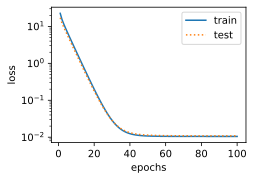

weight: [[ 1.1835649]
 [-3.3965468]
 [ 5.6011252]] 
bias: [4.9968348]


In [13]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])


final epoch: train loss 149.99442 test loss 89.58334


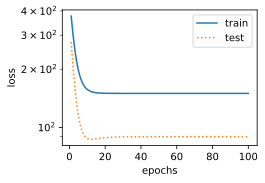

weight: [[16.946716]] 
bias: [2.6122744]


In [14]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])


final epoch: train loss 0.5400648 test loss 151.2113


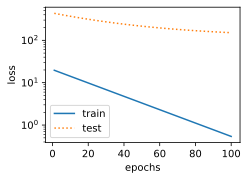

weight: [[4.2160378 ]
 [1.0062413 ]
 [0.77712923]] 
bias: [1.450374]


In [15]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])